In [1]:
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import loader as ld
import viz as vi

In [2]:
# Load data 
recs = ld.load_recordings_object('/Users/nataliecygan/Desktop/olfaction/EOG-data-processing/data_obj/oct10_recording.pkl')

In [3]:
FS = 30000

<h2>Recording 001: Breathing baseline</h2>

In this recording, Zara was breathing. We can see that the electrode was not in a fixed position until about ~100s in. At around ~270s, the electrode came out.

Below is a plot of the raw data

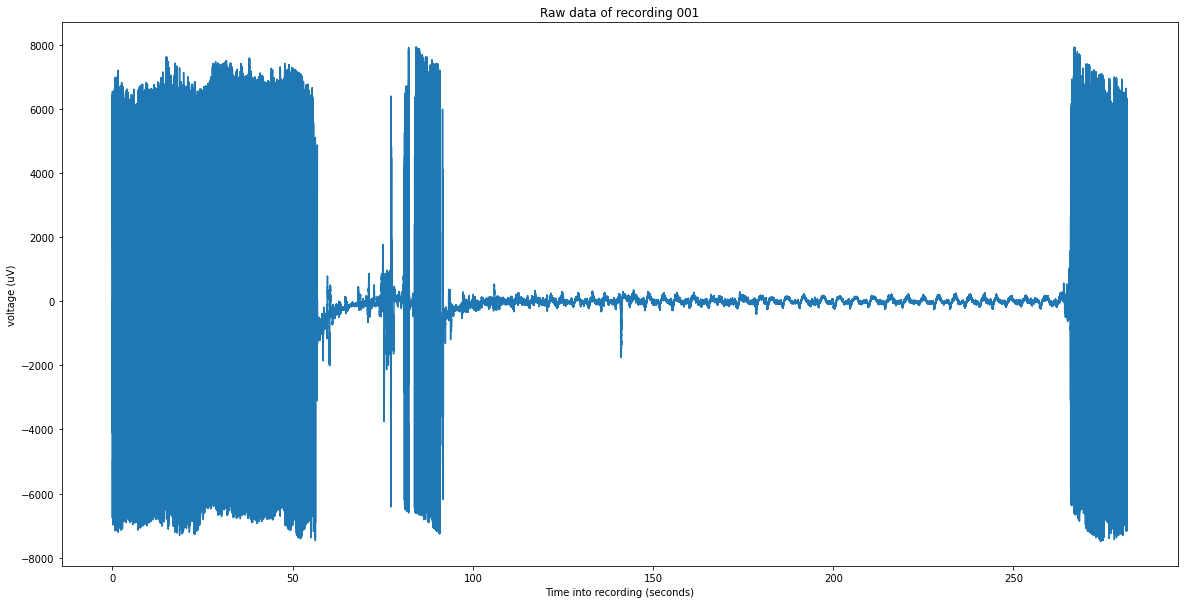

In [4]:
plt.rcParams["figure.figsize"]=20,10
vi.matplotlib_full_raw(recs, '001')

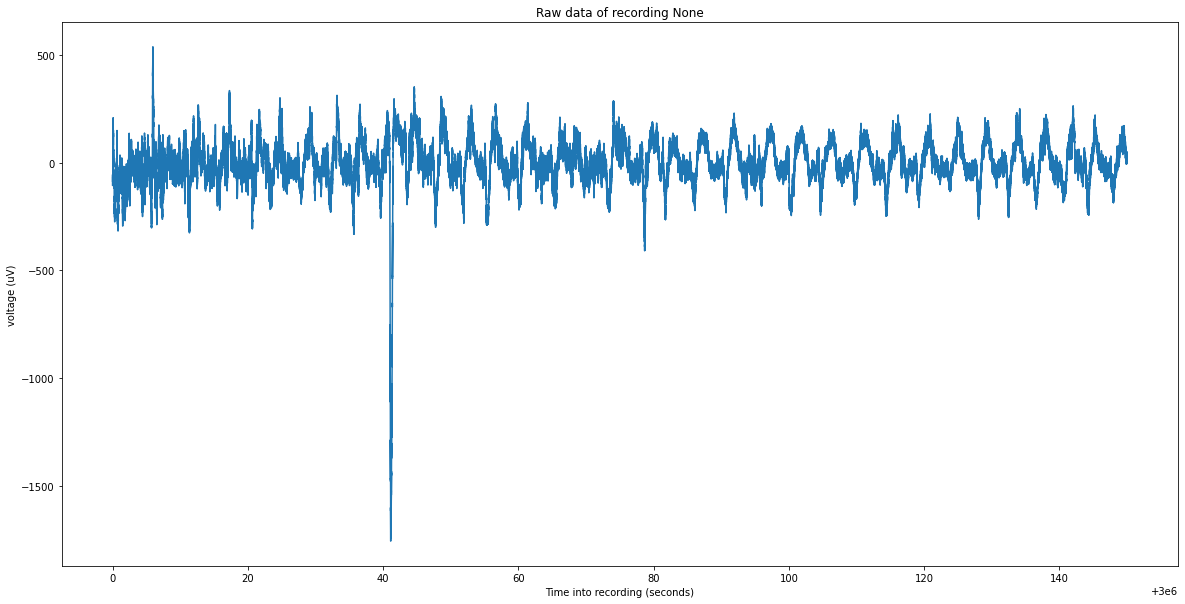

In [5]:
sample_start_s = 100
sample_end_s = 250

data_sample = recs['001']['data'][FS * sample_start_s: FS * sample_end_s]
vi.matplotlib_snippet(data_sample, sample_start_s, sample_end_s)

In [6]:
freq_001 = np.fft.rfftfreq(data_sample.shape[0])
freq_001 *= FS
fft_001 = np.fft.rfft(data_sample)

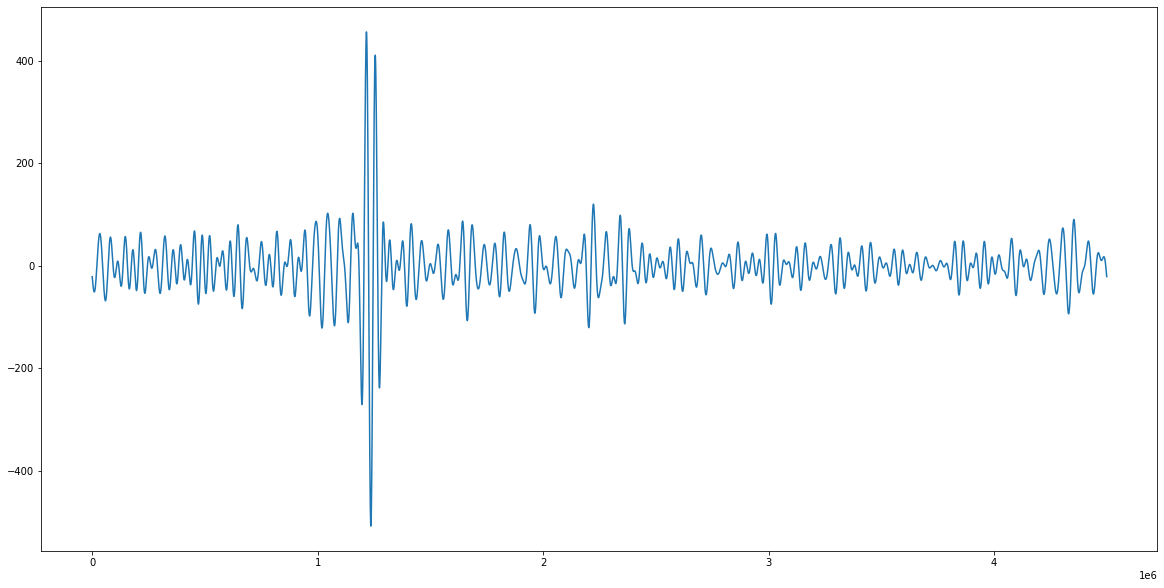

In [7]:
out = fft_001
f0 = np.where(np.abs(freq_001) < 0.5, np.zeros(freq_001.shape[0]), np.ones(freq_001.shape[0]))
f1 = np.where(np.abs(freq_001) > 1, np.zeros(freq_001.shape[0]), np.ones(freq_001.shape[0]))
out = out * (f1 * f0)#np.logical_xor((f1 * f0),)
y = np.fft.irfft(out)
plt.plot(y)

<h2>Recording 002: First odor trial recording</h2>

In this recording, we introduced a variety of odors and shams. Below is a plot of the raw recording data. The horizontal small bars represent duration of a stimuli (either odor or sham)


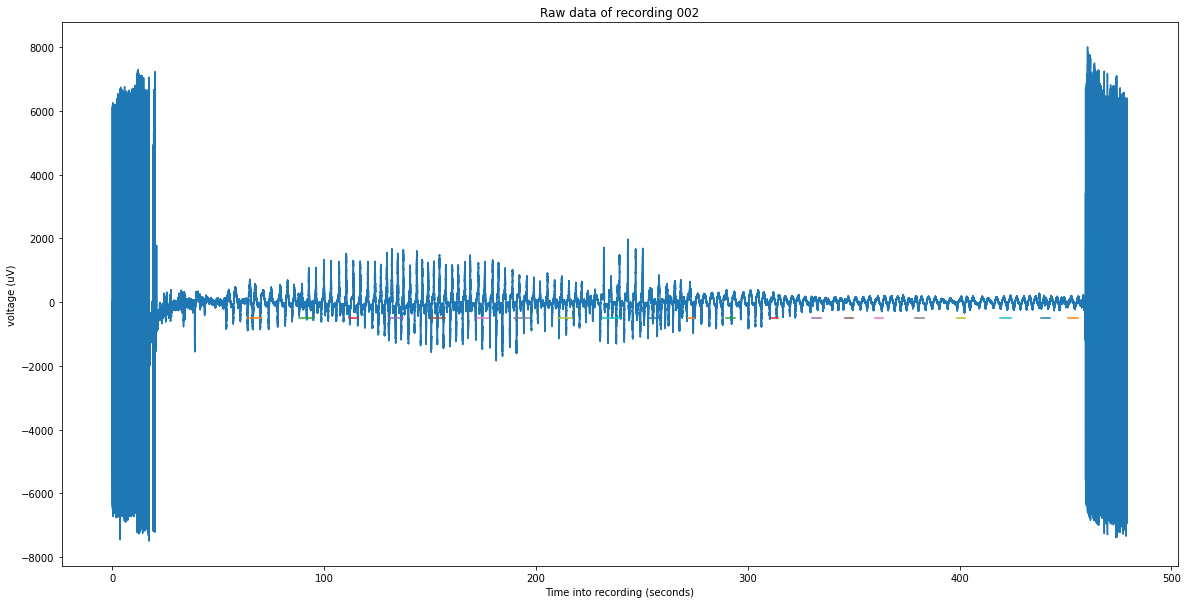

In [8]:
vi.matplotlib_full_raw(recs, '002')

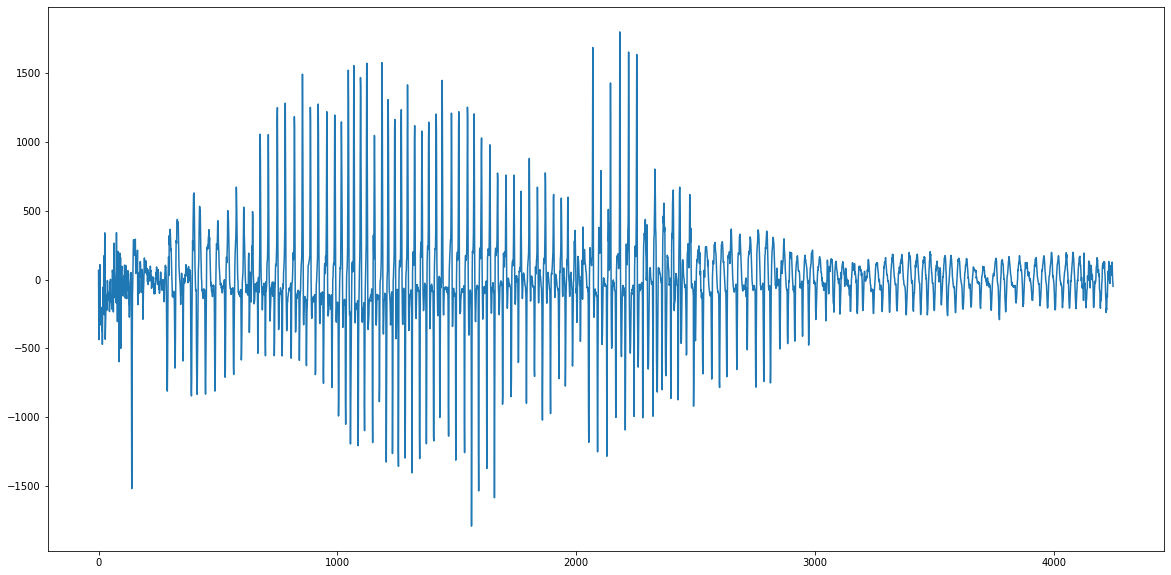

In [14]:
# Plot a shortened version
plt.plot(recs['002']['data'][25 * FS: 450 * FS:3000])

In [15]:
def apply_filter(data_fft, freq, bounds):
    """
    Builds and applies a filter to data_fft
    
    Inputs:
    - data_fft: numpy array representing the fft of the singal that should be filtered
    - freq: numpy array of frequency values in data_fft (this is the output from np.fft.fftfreq)
    - bounds: A list of tuples representing the bounds on desired bands of frequencies. 
              These are the bounds to be kept after the filtering.
    Outputs:
    - filtered signal
    
    Ex: if bounds = [(0.25, 1), (3, 3.25)], then we filter out frequencies 0-0.25, 1-3, and 3.25+
    """
    
    filt = np.zeros(freq.shape[0])
    for b in bounds: 
        # Filter out anything lower than b[0]
        if b[0] is not None:
            f1 = np.where(np.abs(freq) < b[0], np.zeros(freq.shape[0]), np.ones(freq.shape[0])) 
        else:
            f1 = np.ones(freq.shape[0])
        # Filter out anything higher than b[1]
        if b[1] is not None:
            f2 = np.where(np.abs(freq) > b[1], np.zeros(freq.shape[0]), np.ones(freq.shape[0])) 
        else:
            f2 = np.ones(freq.shape[0])
        
        # Combined filter: ones within the range b[0]-b[1], zero elsewhere
        # add & clip
        f = f1 * f2
        filt = np.logical_xor(filt, f) # Combine with other filters

    # filter fft by filt and computer irfft
    out = data_fft * filt
    out_sig = np.fft.irfft(out)
    return out_sig

### Filter tests

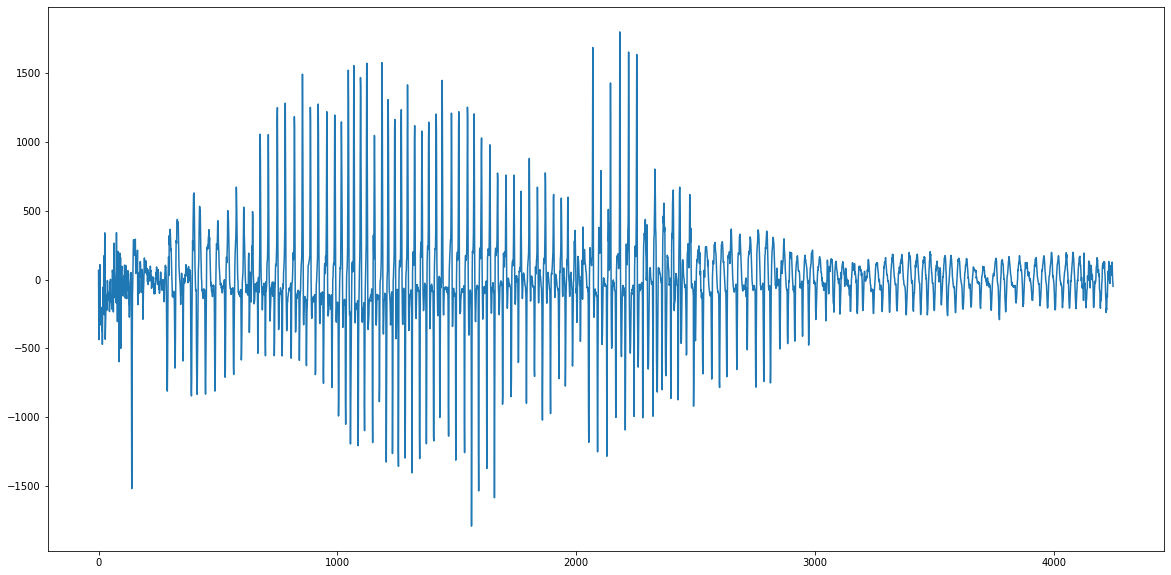

In [19]:
rec2 = recs['002']['data']
fft2 = np.fft.rfft(rec2)
freq = np.fft.rfftfreq(rec2.shape[0])
freq *= FS
plt.plot(recs['002']['data'][25 * FS: 450 * FS:3000])

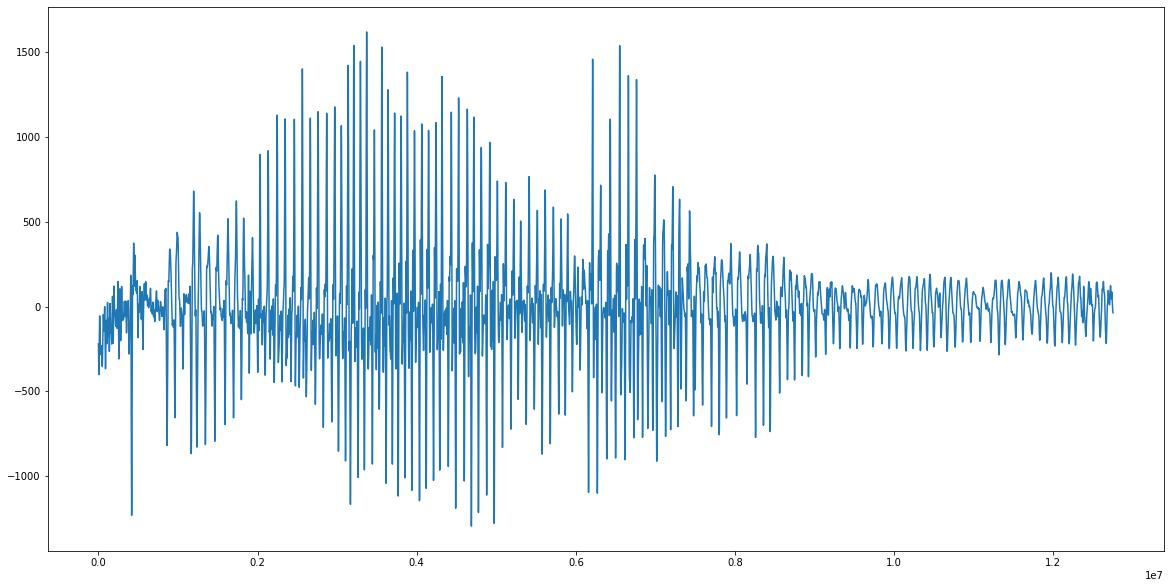

In [57]:
# Test 1: apply a filter that keeps frequencies between 0-3Hz and 5Hz+
out = apply_filter(fft2, freq, [(0,2)])#, (10, None)])
plt.plot(out[25 * FS: 450 * FS])

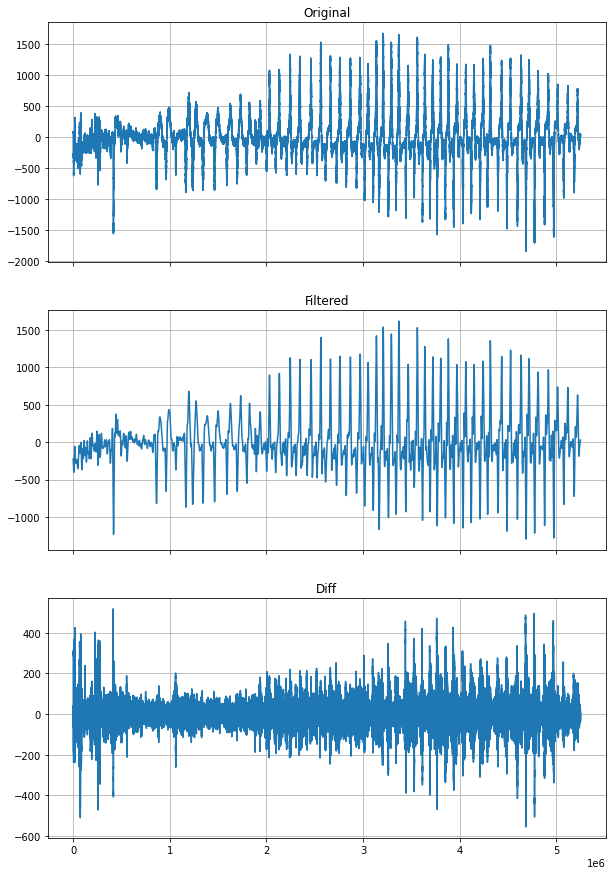

In [59]:
start_time, end_time = 25, 200

orig_signal = recs['002']['data'][start_time * FS: end_time * FS]
filtered_signal = out[start_time * FS: end_time * FS]

fig, ax = plt.subplots(3, 1, figsize=(10,15), sharex=True)
ax[0].plot(orig_signal)
ax[0].set_title('Original')
ax[1].plot(filtered_signal)
ax[1].set_title('Filtered')

diff = orig_signal - filtered_signal

ax[2].plot(diff)
ax[2].set_title('Diff')

ax[0].grid()
ax[1].grid()
ax[2].grid()


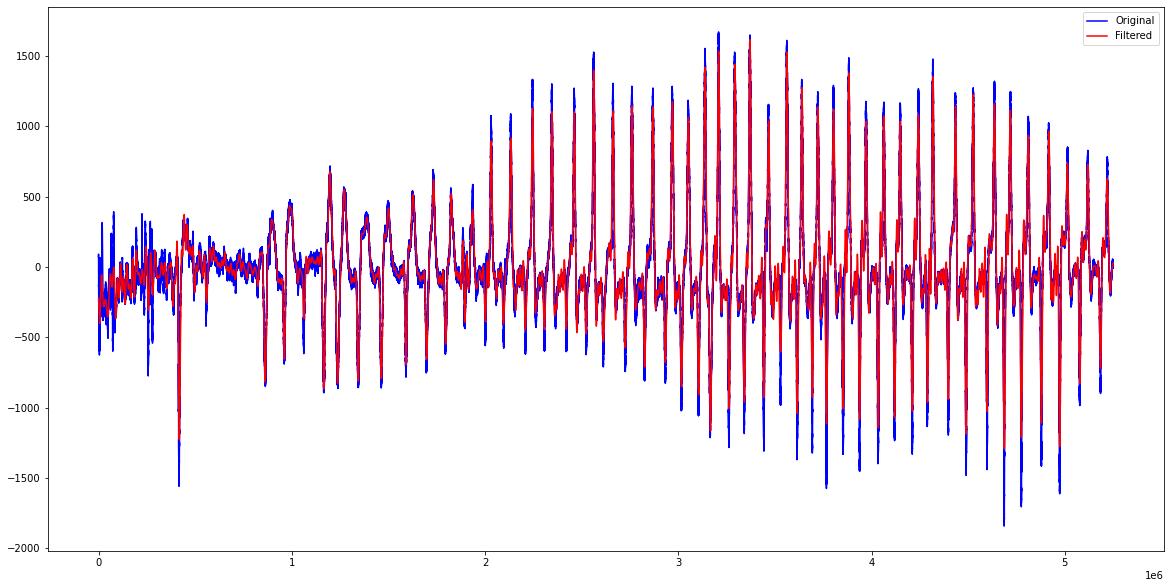

In [60]:
plt.figure()
plt.plot(orig_signal, 'b')
plt.plot(filtered_signal, 'r')
plt.legend(['Original', 'Filtered'])

/Users/nataliecygan/miniforge3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


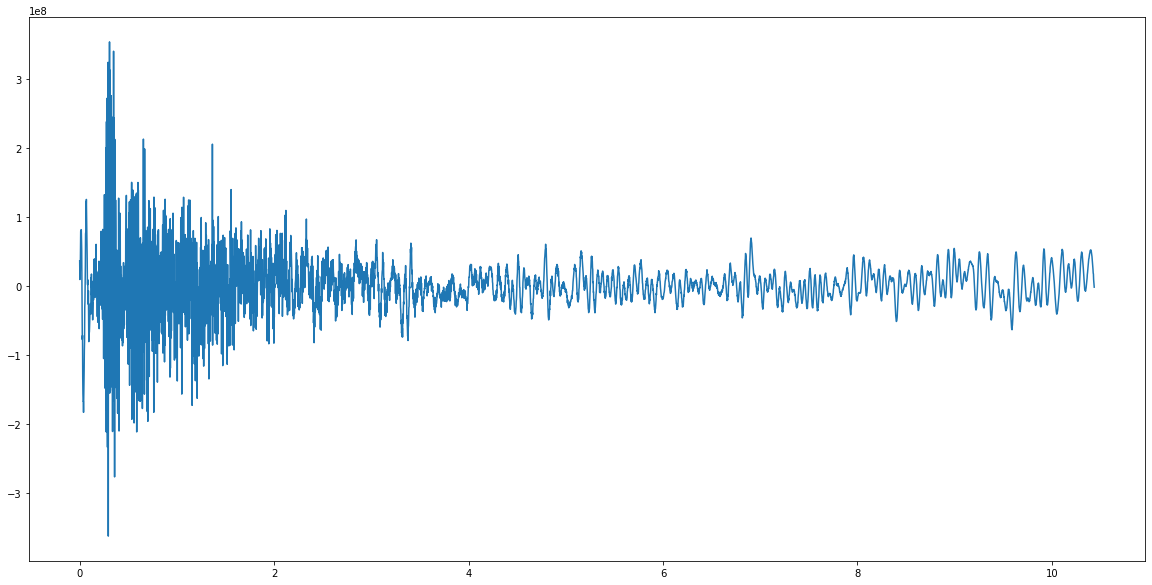

In [55]:
limit = 500 * 10
plt.plot(freq[:limit], fft2[:limit])

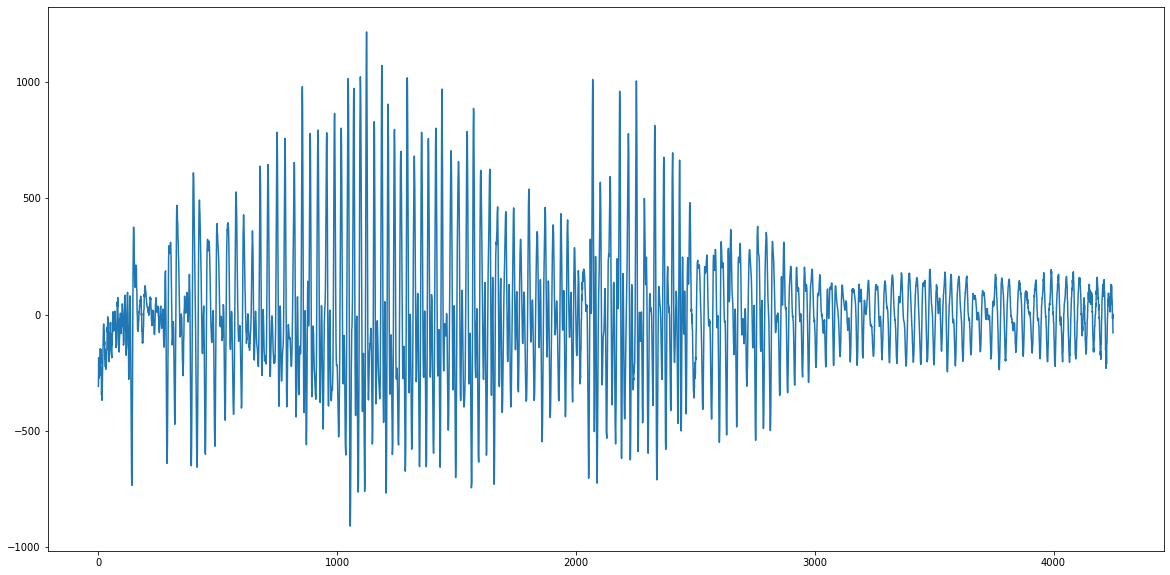

In [56]:
# Test 1: apply a filter that keeps frequencies between 0-3Hz and 5Hz+
out = apply_filter(fft2, freq, [(0,1), (5, 5.5)])
plt.plot(out[25 * FS: 450 * FS:3000])